## Preparing the dataset

In [1]:
# The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

# Preparing the dataset
# Preparation:

# Fill missing values with zeros.
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

import pandas as pd

df = pd.read_csv("car_fuel_efficiency.csv")
df.tail()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551
9703,270,3.0,140.0,2908.043477,14.7,2005,Asia,Diesel,All-wheel drive,-1.0,14.884467


In [17]:
# NB - I also see that num_doors is negative - better fill it with zeroes too...

# df.describe()

In [18]:
df.num_doors = abs(df.num_doors)
# df.describe()
# now problem fixed

In [4]:
# missing values - count and fill missing values with zeros.
df.isna().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [5]:
# replace NaN or missing with zeros
df = df.fillna(0)
df.isna().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [15]:
# df.describe()
# check - looks good

In [7]:
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [8]:
len(df_full_train), len(df_test) # (7763, 1941)

(7763, 1941)

In [9]:
len(df_train), len(df_val)  # (5822, 1941)

(5822, 1941)

In [10]:
# reset index in our splits

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
# now prepare our label (target variable) = fuel_efficiency_mpg
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
len(y_train), len(y_val), len(y_test)
# (5822, 1941, 1941)

(5822, 1941, 1941)

In [12]:
# remove our label fuel_efficiency_mpg so model cannot learn from it accidentally

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [16]:
# check all good
# df_train.head()

In [21]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

# we use many categorical features, thus one-hot encoding is needed:
from sklearn.feature_extraction import DictVectorizer

# then we need baked-in SKL metrics so we save time by not hand-coding them:
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

train_dicts = df_train.to_dict(orient='records')
# train_dicts[:5] # quick check - all looks good


In [33]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts) 
# used DictVectorizer for 1-hot encoding of our training dataset

In [34]:
# CHECK 1:
dv.get_feature_names_out() # after 1-hot encoding how our features look like...
# old version get_feature_names is deprecated, new version is dv.get_feature_names_out()

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [35]:
X_train[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (1, 14)>

In [37]:
# # CHECK 2 - does not work if sparse = true:
# import numpy as np
# for name, value in zip(dv.get_feature_names_out(), X_train[0]):
#     print(name, value) 
#     # prints our first row nicely using python zip() function - manual check...

## Question 1

In [39]:
# Question 1
# Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

# Train a model with max_depth=1.
# Which feature is used for splitting the data?

# 'vehicle_weight' === vehicle_weight <= 3022.11
# 'model_year'
# 'origin'
# 'fuel_type'

# we are building a regressor model - to predict fuel efficiency:
from sklearn.tree import DecisionTreeRegressor


In [40]:

# train the decision tree with max_depth=1.

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train) # NB - max_depth 1

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [41]:
# now how to find which feature is used for splitting the data -
from sklearn.tree import export_text
# and get weight coefficients for our decisions
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



## Question 2

In [45]:
# Question 2
# Train a random forest regressor with these parameters:

# n_estimators=10
# random_state=1
# n_jobs=-1 (optional - to make training faster)
# What's the RMSE of this model on the validation data?

# 0.045
# 0.45 == RMSE: 0.4618
# 4.5 
# 45.0

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1  
)
rf.fit(X_train, y_train)


,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
# prepare X_val

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = rf.predict(X_val)

# What's the RMSE of random forest regressor model on the validation data?
from sklearn.metrics import mean_squared_error

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse:.4f}")


RMSE: 0.4618


In [52]:
# Check myself another way
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

score = round(rmse(y_val, y_pred), 4)
float(score) # 0.4618 - same as before...

0.4618

## Question 3

In [58]:
# Question 3
# Now let's experiment with the n_estimators parameter

# Try different values of this parameter from 10 to 200 with step 10.
# Set random_state to 1.
# Evaluate the model on the validation dataset.
# After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

# 10
# 25
# 80
# 200 === 200 0.442
# If it doesn't stop improving, use the latest iteration number in your answer.

scores = []

from tqdm.auto import tqdm

for p in tqdm(range(10, 201, 10)):
    # experiment with the n_estimators parameter
    rf = RandomForestRegressor(
    n_estimators=p,
    random_state=1,
    n_jobs=-1  
    )
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)

    score = round(rmse(y_val, y_pred), 3) # Consider 3 decimal places for calculating the answer.
    scores.append((p, score))
    print(p, score)
    
# scores

  0%|          | 0/20 [00:00<?, ?it/s]

10 0.462
20 0.453
30 0.451
40 0.448
50 0.447
60 0.446
70 0.445
80 0.445
90 0.445
100 0.445
110 0.444
120 0.444
130 0.444
140 0.444
150 0.443
160 0.443
170 0.443
180 0.442
190 0.443
200 0.442


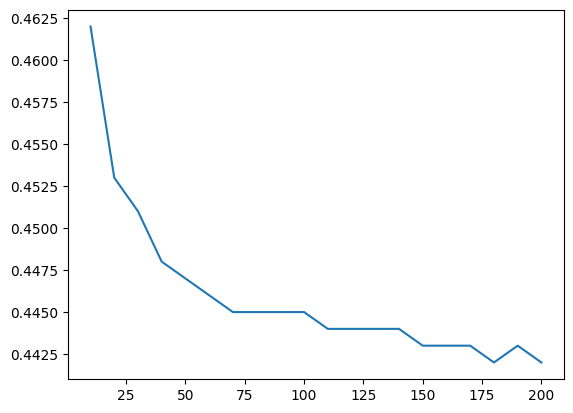

In [62]:
import seaborn as sns
from matplotlib import pyplot as plt

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse) 
# plt.legend()

## Question 4

In [66]:
# Question 4
# Let's select the best max_depth:

# Try different values of max_depth: [10, 15, 20, 25]
# For each of these values,
# try different values of n_estimators from 10 till 200 (with step 10)
# calculate the mean RMSE
# Fix the random seed: random_state=1
# What's the best max_depth, using the mean RMSE?

# 10 === Mean RMSE: 0.4419 ± 0.0031 for max_depth: 10
# 15
# 20
# 25

mean_rmse = []
total_rmse = []

for d in tqdm([10, 15, 20, 25]):
    scores = []
    for p in tqdm(range(10, 201, 10)):
        # experiment with the n_estimators parameter and max_depth:
        rf = RandomForestRegressor(
        n_estimators=p,
        max_depth=d,
        random_state=1,
        n_jobs=-1  
        )
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
    
        score = round(rmse(y_val, y_pred), 4)
        scores.append(score)

    s = np.mean(scores)
    total_rmse.append(scores) # in case we may plot every max_depth curve later
    mean_rmse.append((d, s))
    std_rmse = np.std(scores)
    print(f"Mean RMSE: {s:.4f} ± {std_rmse:.4f} for max_depth: {d:.0f}")


mean_rmse

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Mean RMSE: 0.4419 ± 0.0031 for max_depth: 10


  0%|          | 0/20 [00:00<?, ?it/s]

Mean RMSE: 0.4450 ± 0.0040 for max_depth: 15


  0%|          | 0/20 [00:00<?, ?it/s]

Mean RMSE: 0.4453 ± 0.0041 for max_depth: 20


  0%|          | 0/20 [00:00<?, ?it/s]

Mean RMSE: 0.4456 ± 0.0044 for max_depth: 25


[(10, np.float64(0.44191)),
 (15, np.float64(0.4450299999999999)),
 (20, np.float64(0.44531)),
 (25, np.float64(0.4456199999999999))]

## Question 5

In [68]:
# Question 5
# We can extract feature importance information from tree-based models.

# At each step of the decision tree learning algorithm, it finds the best split. 
# When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
# This gain is quite useful in understanding what are the important features for tree-based models.

# In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

# For this homework question, we'll find the most important feature:

# Train the model with these parameters:
# n_estimators=10,
# max_depth=20,
# random_state=1,
# n_jobs=-1 (optional)
# Get the feature importance information from this model

# What's the most important feature (among these 4)?

# vehicle_weight === Feature name: vehicle_weight, value: 0.9592
# horsepower
# acceleration
# engine_displacement

rf = RandomForestRegressor(
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1  
)
rf.fit(X_train, y_train)
rf
# y_pred = rf.predict(X_val)

# score = round(rmse(y_val, y_pred), 4)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
for f, v in zip(dv.get_feature_names_out(), rf.feature_importances_):
    if f in ["vehicle_weight", "horsepower", "acceleration", "engine_displacement"]:
        print(f"Feature name: {f}, value: {v:.4f}") 

# Feature name: acceleration, value: 0.0116
# Feature name: engine_displacement, value: 0.0034
# Feature name: horsepower, value: 0.0161
# Feature name: vehicle_weight, value: 0.9592

Feature name: acceleration, value: 0.0116
Feature name: engine_displacement, value: 0.0034
Feature name: horsepower, value: 0.0161
Feature name: vehicle_weight, value: 0.9592


## Question 6

In [74]:
# Question 6
# Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

# Install XGBoost
# Create DMatrix for train and validation
# Create a watchlist
# Train a model with these parameters for 100 rounds:
# xgb_params = {
#     'eta': 0.3, 
#     'max_depth': 6,
#     'min_child_weight': 1,
    
#     'objective': 'reg:squarederror',
#     'nthread': 8,
    
#     'seed': 1,
#     'verbosity': 1,
# }
# Now change eta from 0.3 to 0.1.

# Which eta leads to the best RMSE score on the validation dataset?

# 0.3
# 0.1 === RMSE: 0.4286 if 'eta': 0.1
# Both give equal value

import xgboost as xgb

In [75]:
# Create DMatrix for train and validation
# Create a watchlist

# xgboost needs d-matrix for train - a special data structure:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [76]:
# Train a model with these parameters for 100 rounds:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [77]:
y_pred = model.predict(dval)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.4490


In [78]:
# Now change eta from 0.3 to 0.1.

# Which eta leads to the best RMSE score on the validation dataset?

# 0.3
# 0.1
# Both give equal value

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [79]:
y_pred = model.predict(dval)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse:.4f}") # RMSE: 0.4286 if 'eta': 0.1

RMSE: 0.4286
